In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [20]:
#dblp to acm
macros={}
micrps={}
macro_source=[0.580285617353865,0.6153854722163908,0.5714904051642576,0.5800755133949513,0.538761242335349]
micro_source=[0.6807017543859649,0.6940620782726046,0.6626180836707153,0.6651821862348178,0.6238866396761134]

# acm to dblp
# micro_source =[0.7235568304051632, 0.7266045177482969, 0.6819648619576909, 0.6690570096808892, 0.6609896020078881]
# macro_source = [0.7277388796616681, 0.7323473012014224, 0.6913384274543234, 0.6793803221838665, 0.6741924439094485]
#cora
# micro_source =[0.5136632200886263, 0.5468980797636632, 0.7071639586410635, 0.6824224519940916, 0.7263663220088626]
# macro_source =[0.4695527329827613, 0.5269426917560238, 0.6869563057222476, 0.6608502386858596, 0.7234475824858786]
methods = ["graphtta", "homottt", "soga"]
seeds = [1, 3, 5, 7, 9]

results = {
    "graphtta": {"macro_f1_means": [], "macro_f1_stds": [], "micro_f1_means": [], "micro_f1_stds": []},
    "homottt": {"macro_f1_means": [], "macro_f1_stds": [], "micro_f1_means": [], "micro_f1_stds": []},
    "soga": {"macro_f1_means": [], "macro_f1_stds": [], "micro_f1_means": [], "micro_f1_stds": []}
}



In [21]:

folder_name = {"DBLP to ACM": "DBLP_ACM_GCN_3_macro_1_1_1", "ACM to DBLP": "ACM_DBLP_GCN_3_macro_1_1_1", "Cora to Cora-C": "Cora_Cora-C-flip_GCN_3_macro_1_1_1"}
for s_i, group in enumerate(["DBLP to ACM", "ACM to DBLP", "Cora to Cora-C"]):
    for method in methods:
        with open(f'codes/record/{folder_name[group]}/{method}_{seed}.pkl', 'rb') as f:
            data = pickle.load(f)
        

{'Method': ['graphtta', 'homottt', 'soga', 'Source'],
 'Macro F1 Mean': ['73.89', '88.52', '94.24', '70.10'],
 'Macro F1 Std': ['5.69', '1.82', '0.14', '2.44'],
 'Micro F1 Mean': ['73.11', '88.34', '93.99', '69.24'],
 'Micro F1 Std': ['5.45', '1.76', '0.15', '2.75']}

In [51]:
import pandas as pd
folder_name = {"DBLP to ACM": "DBLP_ACM_GCN_3_macro_1_1_1", "ACM to DBLP": "ACM_DBLP_GCN_3_macro_1_1_1", "Cora to Cora-C": "Cora_Cora-C-flip_GCN_3_macro_1_1_1"}
all_results = {}
for s_i, group in enumerate(["DBLP to ACM", "ACM to DBLP", "Cora to Cora-C"]):
    # Initialize a dictionary to store the results
    results_dict = {
        "Method": [],
        "Macro F1 Mean": [],
        "Macro F1 Std": [],
        "Micro F1 Mean": [],
        "Micro F1 Std": []
    }

    for method in methods:
        best_micros = []
        best_macros = []
        for seed in seeds:
            with open(f"codes/record/{folder_name[group]}/{method}_{seed}.pkl", "rb") as f:
                data = pickle.load(f)
            macro_f1 = list(map(float, data["Macro F1"]))
            micro_f1 = list(map(float, data["Micro F1"]))
            best_micros.append(micro_f1[-1])
            best_macros.append(macro_f1[-1])
        
        macro_mean = np.mean(best_macros) * 100
        macro_std = np.std(best_macros) * 100
        micro_mean = np.mean(best_micros) * 100
        micro_std = np.std(best_micros) * 100
        
        results_dict["Method"].append(method)
        results_dict["Macro F1 Mean"].append(f"{macro_mean:.2f}")
        results_dict["Macro F1 Std"].append(f"{macro_std:.2f}")
        results_dict["Micro F1 Mean"].append(f"{micro_mean:.2f}")
        results_dict["Micro F1 Std"].append(f"{micro_std:.2f}")

    macro_mean = np.mean(macro_source) * 100
    macro_std = np.std(macro_source) * 100
    micro_mean = np.mean(micro_source) * 100
    micro_std = np.std(micro_source) * 100
    results_dict["Method"].append("Source")
    results_dict["Macro F1 Mean"].append(f"{macro_mean:.2f}")
    results_dict["Macro F1 Std"].append(f"{macro_std:.2f}")
    results_dict["Micro F1 Mean"].append(f"{micro_mean:.2f}")
    results_dict["Micro F1 Std"].append(f"{micro_std:.2f}")
    # Create a DataFrame from the results dictionary
    results_df = pd.DataFrame(results_dict)
    all_results[group]=results_df

# Display the DataFrame
print(pd.concat(all_results))

                    Method Macro F1 Mean Macro F1 Std Micro F1 Mean  \
DBLP to ACM    0  graphtta         57.55         1.38         64.70   
               1   homottt         58.26         2.15         66.80   
               2      soga         61.96         0.89         69.10   
               3    Source         57.72         2.44         66.53   
ACM to DBLP    0  graphtta         73.89         5.69         73.11   
               1   homottt         87.97         2.30         87.76   
               2      soga         94.21         0.13         93.96   
               3    Source         57.72         2.44         66.53   
Cora to Cora-C 0  graphtta         37.29        17.75         39.92   
               1   homottt         66.31         4.30         66.39   
               2      soga         12.08        10.47         19.31   
               3    Source         57.72         2.44         66.53   

                 Micro F1 Std  
DBLP to ACM    0         1.06  
            

In [52]:
all_results

{'DBLP to ACM':      Method Macro F1 Mean Macro F1 Std Micro F1 Mean Micro F1 Std
 0  graphtta         57.55         1.38         64.70         1.06
 1   homottt         58.26         2.15         66.80         1.20
 2      soga         61.96         0.89         69.10         1.04
 3    Source         57.72         2.44         66.53         2.36,
 'ACM to DBLP':      Method Macro F1 Mean Macro F1 Std Micro F1 Mean Micro F1 Std
 0  graphtta         73.89         5.69         73.11         5.45
 1   homottt         87.97         2.30         87.76         2.27
 2      soga         94.21         0.13         93.96         0.14
 3    Source         57.72         2.44         66.53         2.36,
 'Cora to Cora-C':      Method Macro F1 Mean Macro F1 Std Micro F1 Mean Micro F1 Std
 0  graphtta         37.29        17.75         39.92        13.22
 1   homottt         66.31         4.30         66.39         3.34
 2      soga         12.08        10.47         19.31         9.94
 3    Source

In [53]:
# Create a dictionary to store the concatenated results
concat_results = {}

# Iterate through each group in all_results
for group, df in all_results.items():
    # Set the group as the first level of the column
    df.columns = pd.MultiIndex.from_product([[group], df.columns])
    concat_results[group] = df

# Concatenate all the DataFrames
final_results_df = pd.concat(concat_results.values(), axis=1)

In [54]:
final_results_df

DBLP to ACM                                                        \
       Method Macro F1 Mean Macro F1 Std Micro F1 Mean Micro F1 Std   
0    graphtta         57.55         1.38         64.70         1.06   
1     homottt         58.26         2.15         66.80         1.20   
2        soga         61.96         0.89         69.10         1.04   
3      Source         57.72         2.44         66.53         2.36   

  ACM to DBLP                                                        \
       Method Macro F1 Mean Macro F1 Std Micro F1 Mean Micro F1 Std   
0    graphtta         73.89         5.69         73.11         5.45   
1     homottt         87.97         2.30         87.76         2.27   
2        soga         94.21         0.13         93.96         0.14   
3      Source         57.72         2.44         66.53         2.36   

  Cora to Cora-C                                                        
          Method Macro F1 Mean Macro F1 Std Micro F1 Mean Micro F1 Std  
0       graphtta         37.29        17.75         39.92        13.22  
1        homottt         66.31         4.30         66.39         3.34  
2           soga         12.08        10.47         19.31         9.94  
3         Source         57.72         2.44         66.53         2.36

In [22]:
import pandas as pd

# Initialize a dictionary to store the results
results_dict = {
    "Method": [],
    "Macro F1 Mean": [],
    "Macro F1 Std": [],
    "Micro F1 Mean": [],
    "Micro F1 Std": []
}

for method in methods:
    best_micros = []
    best_macros = []
    for seed in seeds:
        with open(f"codes/record/DBLP_ACM_GCN_3_macro_1_1_1/{method}_{seed}.pkl", "rb") as f:
            data = pickle.load(f)
        macro_f1 = list(map(float, data["Macro F1"]))
        micro_f1 = list(map(float, data["Micro F1"]))
        best_micros.append(max(micro_f1))
        best_macros.append(max(macro_f1))
    
    macro_mean = np.mean(best_macros) * 100
    macro_std = np.std(best_macros) * 100
    micro_mean = np.mean(best_micros) * 100
    micro_std = np.std(best_micros) * 100
    
    results_dict["Method"].append(method)
    results_dict["Macro F1 Mean"].append(f"{macro_mean:.2f}")
    results_dict["Macro F1 Std"].append(f"{macro_std:.2f}")
    results_dict["Micro F1 Mean"].append(f"{micro_mean:.2f}")
    results_dict["Micro F1 Std"].append(f"{micro_std:.2f}")

macro_mean = np.mean(macro_source) * 100
macro_std = np.std(macro_source) * 100
micro_mean = np.mean(micro_source) * 100
micro_std = np.std(micro_source) * 100
results_dict["Method"].append("Source")
results_dict["Macro F1 Mean"].append(f"{macro_mean:.2f}")
results_dict["Macro F1 Std"].append(f"{macro_std:.2f}")
results_dict["Micro F1 Mean"].append(f"{micro_mean:.2f}")
results_dict["Micro F1 Std"].append(f"{micro_std:.2f}")
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)

     Method Macro F1 Mean Macro F1 Std Micro F1 Mean Micro F1 Std
0  graphtta         57.86         1.24         65.65         0.63
1   homottt         59.39         1.76         67.58         1.21
2      soga         63.32         0.32         71.85         0.46
3    Source         57.72         2.44         66.53         2.36


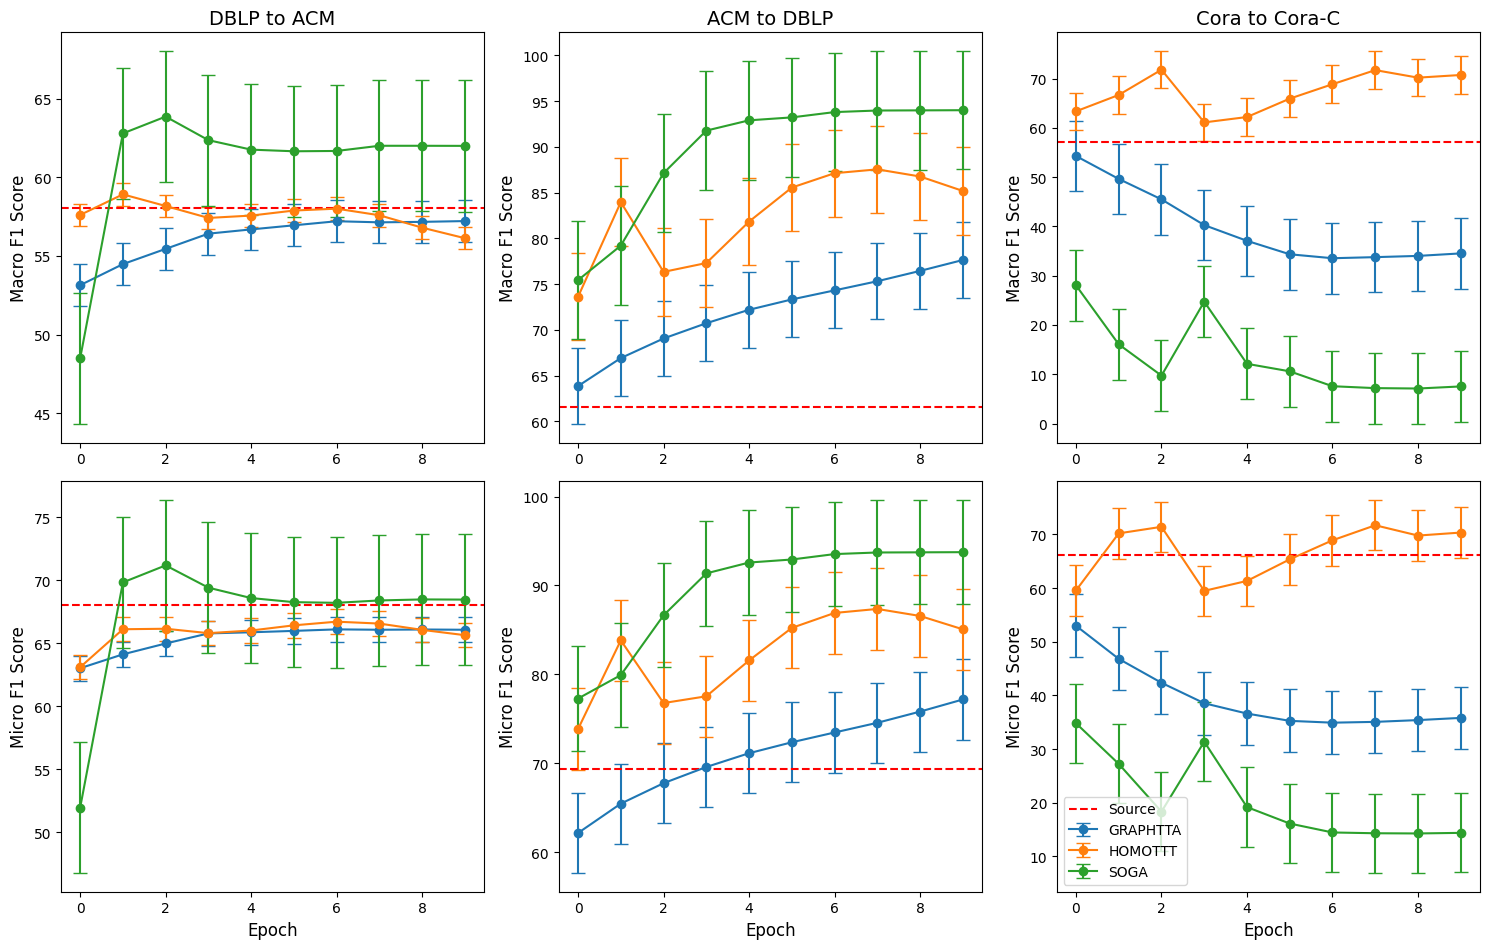

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

folder_name = {"DBLP to ACM": "DBLP_ACM_GCN_3_macro_1_1_1", "ACM to DBLP": "ACM_DBLP_GCN_3_macro_1_1_1", "Cora to Cora-C": "Cora_Cora-C-flip_GCN_3_macro_1_1_1"}
for s_i, group in enumerate(["DBLP to ACM", "ACM to DBLP", "Cora to Cora-C"]):
    for method in methods:
        with open(f'codes/record/{folder_name[group]}/{method}_{seed}.pkl', 'rb') as f:
            data = pickle.load(f)
        
        macro_f1 = [x*100 for x in list(map(float, data['Macro F1']))]
        micro_f1 = [x*100 for x in list(map(float, data['Micro F1']))]
        
        
        axes[0][s_i].errorbar(range(len(macro_f1)), macro_f1, yerr=np.std(macro_f1), label=method.upper(), marker='o',capsize=5)
        axes[1][s_i].errorbar(range(len(micro_f1)), micro_f1, yerr=np.std(micro_f1), label=method.upper(), marker='o',capsize=5)
        
        axes[0][s_i].set_title(group,fontsize=14)
        
        axes[0][s_i].set_ylabel('Macro F1 Score', fontsize=12)
        axes[1][s_i].set_xlabel('Epoch', fontsize=12)
        axes[1][s_i].set_ylabel('Micro F1 Score', fontsize=12)
    axes[0][s_i].axhline(macro_source[s_i]*100, color='r', linestyle='--')
    axes[1][s_i].axhline(micro_source[s_i]*100, label='Source', color='r', linestyle='--')

# Add legends
axes[1][s_i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("dblp_acm_all_seeds.png", dpi=400)

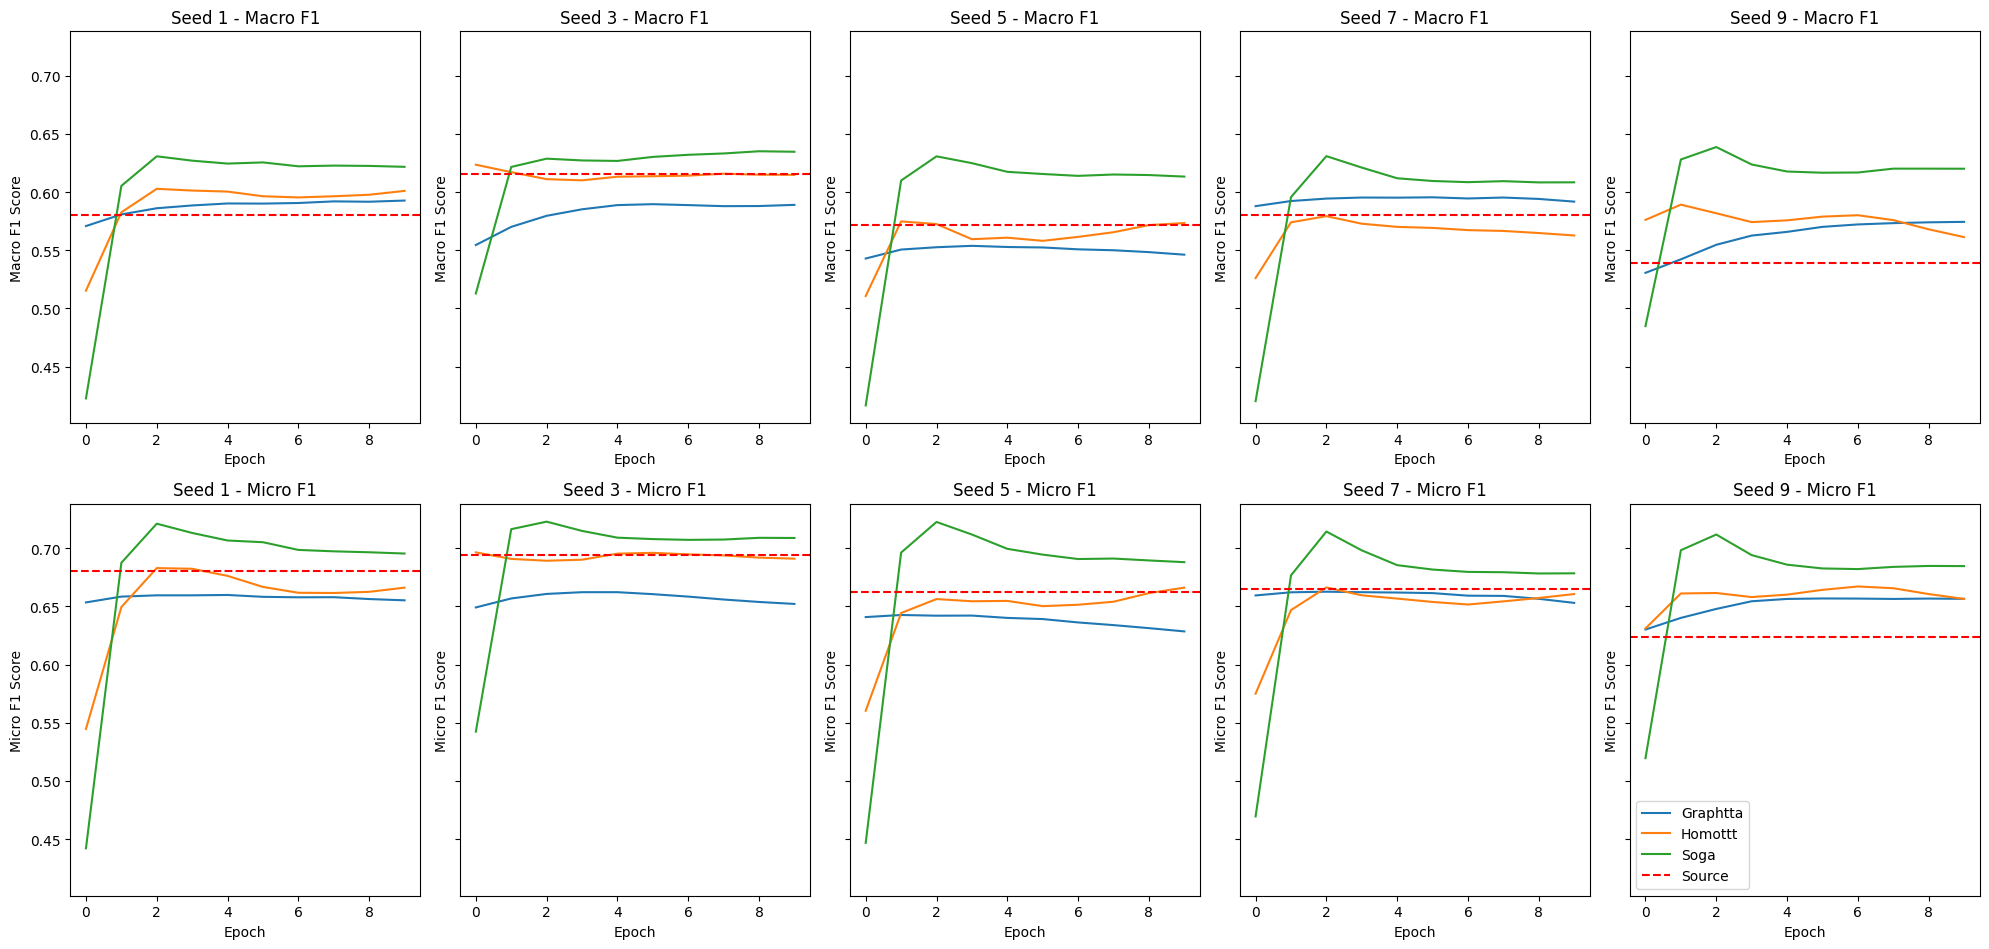

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10),sharey=True)
# fig.suptitle('Performance Scores for Different Seeds', fontsize=16)

for s_i, seed in enumerate(seeds):

    for method in methods:
        with open(f'codes/record/DBLP_ACM_GCN_3_macro_1_1_1/{method}_{seed}.pkl', 'rb') as f:
            data = pickle.load(f)
        
        macro_f1 = list(map(float, data['Macro F1']))
        micro_f1 = list(map(float, data['Micro F1']))
        
        axes[0][s_i].plot(macro_f1, label=method.capitalize())
        axes[1][s_i].plot(micro_f1, label=method.capitalize())
        
        
        axes[0][s_i].set_title(f'Seed {seed} - Macro F1')
        axes[1][s_i].set_title(f'Seed {seed} - Micro F1')
        
        axes[0][s_i].set_xlabel('Epoch')
        axes[0][s_i].set_ylabel('Macro F1 Score')
        axes[1][s_i].set_xlabel('Epoch')
        axes[1][s_i].set_ylabel('Micro F1 Score')
    axes[0][s_i].axhline(macro_source[s_i],  color='r', linestyle='--')
    axes[1][s_i].axhline(micro_source[s_i],label='Source', color='r', linestyle='--')
        

# Add legends
axes[1][s_i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("dblp_acm_all_seeds.png",dpi=400)

In [ ]:
for method in methods:
    